## 1. Data Pre-Processing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Import and high level exploration

In [2]:
df = pd.read_csv("../data/raw/data.csv")

In [3]:
df.shape

(569, 33)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
#filter unnamed out
df = df.drop(columns = ['Unnamed: 32','id'])

In [6]:
df.shape

(569, 31)

In [7]:
#data contains no nulls, no categorical data

#df.info()
def nans(df): return df[df.isnull().any(axis=1)]
nans(df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


### Cleaning

In [8]:
#replace M and B with 1 and 0
df = df.replace("M",1)
df = df.replace("B",0)

### Partition

In [9]:
df_mal = df[df.diagnosis == 1]
df_ben = df[df.diagnosis == 0]

df_ex_diag = df.drop(columns = ['diagnosis'])

### Outliers

In [10]:
def get_prefixes(cols,suffixes):
    result = []
    for col in cols:
        for suffix in suffixes:
            if suffix in col:
                result.append(col.replace(suffix,''))
    
    return(pd.unique(result))    

test = get_prefixes(df.columns, ['_mean','_se','_worst'])
test

array(['radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave points', 'symmetry',
       'fractal_dimension'], dtype=object)

In [11]:
def get_like_cols(prefix,all_cols):
    result = []
    for col in all_cols:
        if prefix in col:
            result.append(col)
    return(result)
    
get_like_cols('radius',df_ex_diag.columns)

['radius_mean', 'radius_se', 'radius_worst']

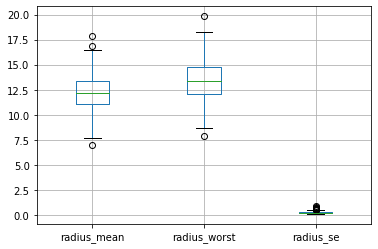

In [12]:
%matplotlib inline

def create_boxplot(df,cols):
    #for col in cols:
    df.boxplot(column = cols)


create_boxplot(df_ben,['radius_mean','radius_worst','radius_se'])

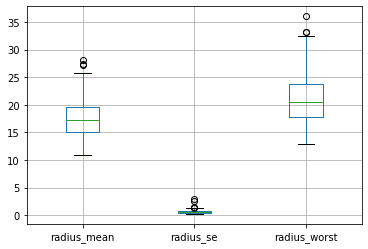

In [13]:
def get_boxplot_for_like_cols(prefix,df):
    all_cols = df.columns
    cols = get_like_cols(prefix,all_cols)
    create_boxplot(df,cols)

get_boxplot_for_like_cols('radius',df_mal)

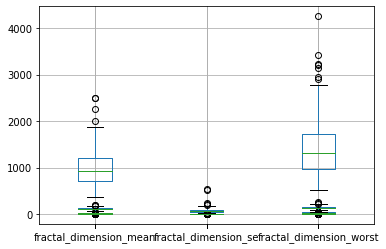

In [14]:
for col in test:
    get_boxplot_for_like_cols(col,df_mal)
    #plt.show()

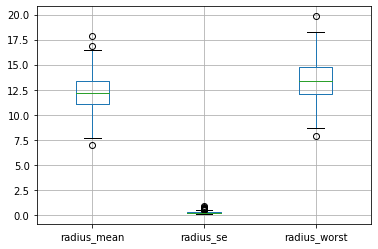

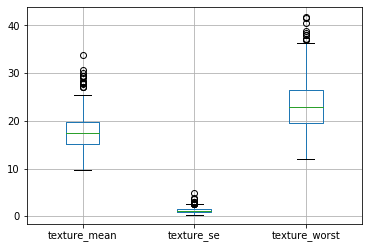

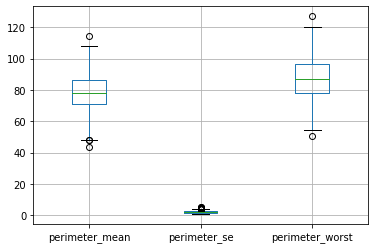

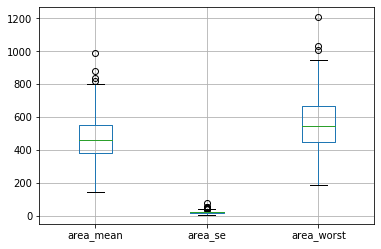

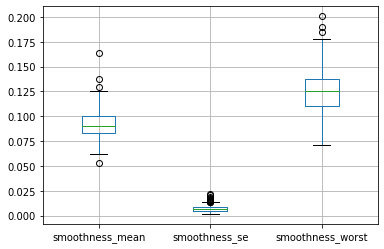

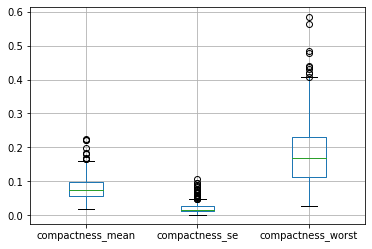

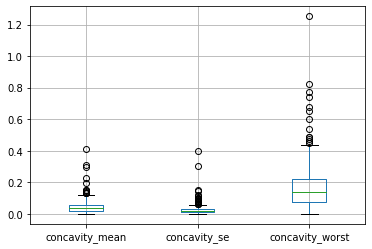

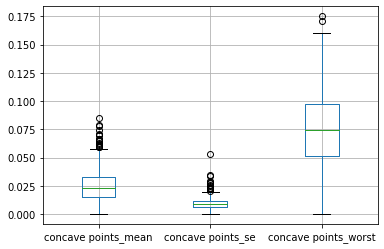

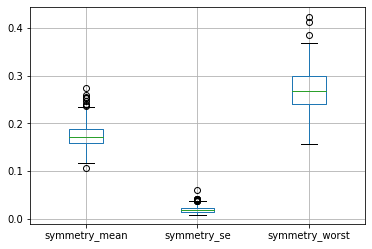

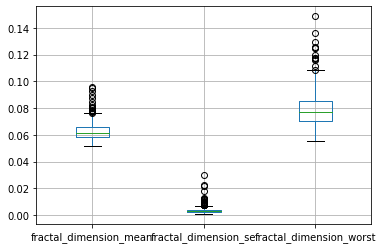

In [15]:
for col in test:
    get_boxplot_for_like_cols(col,df_ben)
    plt.show()

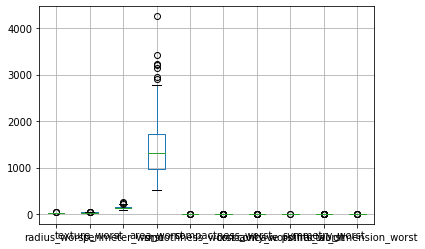

In [16]:
def get_boxplot_for_like_suffixes(suffix,df):
    all_cols = df.columns
    cols = get_like_cols(suffix,all_cols)
    create_boxplot(df,cols)

get_boxplot_for_like_cols('_worst',df_mal)

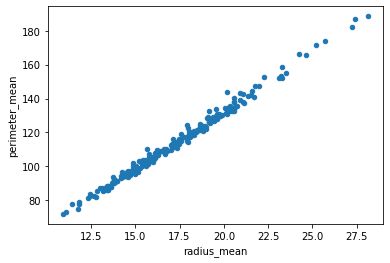

In [17]:
df_mal.plot.scatter(x='radius_mean',y='perimeter_mean')

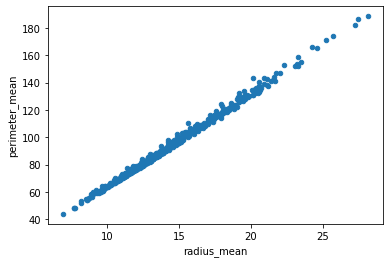

In [18]:
df.plot.scatter(x='radius_mean',y='perimeter_mean')

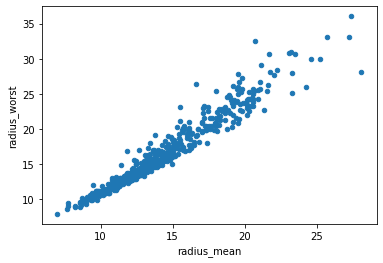

In [19]:
df.plot.scatter(x='radius_mean',y='radius_worst')

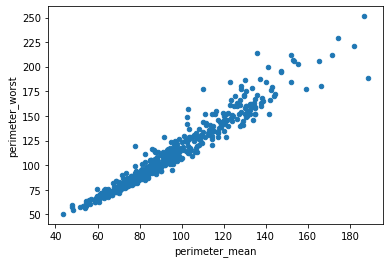

In [20]:
df.plot.scatter(x='perimeter_mean',y='perimeter_worst')

### Multicollinearity detection

### Approach 1: VIF

In [21]:
#correlation
corr_df = df.corr(method='pearson')
corr_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


C:\Users\marta\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marta\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


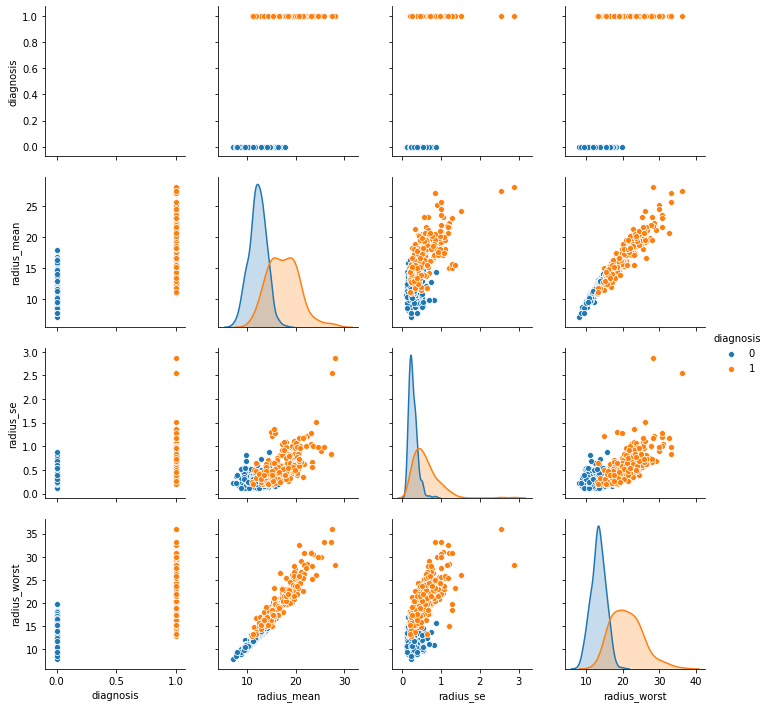

In [22]:
subset = df[['diagnosis','radius_mean','radius_se','radius_worst']]
sns.pairplot(subset, hue = 'diagnosis')

In [23]:
def get_prefixes(cols,suffixes):
    result = []
    for col in cols:
        for suffix in suffixes:
            if suffix in col:
                result.append(col.replace(suffix,''))
    
    return(pd.unique(result))

test = get_prefixes(df.columns, ['_mean','_se','_worst'])

In [24]:
#np.asarray(x).size
#np.asarray(df_ex_diag.columns)

In [25]:
import itertools
cols = np.asarray(df_ex_diag.columns)
x = np.asarray(list(itertools.combinations(cols,2)));

In [26]:
def get_VIF_simple(df,cols):
    proj0 = np.asarray(df[cols[0]])
    proj1 = np.asarray(df[cols[1]])
    slope, intercept, r_value, p_value, std_err = stats.linregress(proj0,proj1)
    if(r_value==1):
        VIF = 1
    else:
        VIF = 1/(1-r_value)
    return(VIF)

In [27]:
def get_VIF_simple_from_arrays(array1,array2):
    slope, intercept, r_value, p_value, std_err = stats.linregress(array1,array2)
    VIF = 1/(1-r_value)
    return(VIF)

In [28]:
#get_VIF_simple(df_ex_diag,['radius_mean','radius_mean'])


In [29]:
def get_VIF(df):
    cols = df.columns
    size = cols.size
    mat = np.zeros((size,size))

    for i in range(size):
        for j in range(size):
            #print([cols[i],cols[j]])
            mat[i,j] = get_VIF_simple(df,np.asarray([cols[i],cols[j]]))
    return mat

VIFs = get_VIF(df_ex_diag)

In [30]:
def remove_max_VIF_col(VIF,df,thresh):
    maxval = np.amax(VIF)
    if(maxval >= thresh):
        loc = np.where(VIF == maxval)[0][1]
        newdf = df.drop([df.columns.tolist()[loc]],axis=1)
    else:
        newdf = df
    return(newdf)
new_df = remove_max_VIF_col(VIFs,df_ex_diag,5)


In [31]:
def drop_multicollinear_features(thresh,df):
    dropped = True    
    while dropped:
        dropped = False
        VIFs = get_VIF(df)
        maxval = np.amax(VIFs)
        if maxval > thresh:
            df = remove_max_VIF_col(VIFs,df,thresh)
            dropped = True
    return(df)
    
features_to_use = drop_multicollinear_features(5,df_ex_diag)
features_to_use.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Approach 2: PCA

In [32]:
#standardise features (ex diagnosis??)
std_features = (df_ex_diag.apply(lambda x : (x - np.mean(x)) / np.std(x)))
std_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [33]:
from sklearn.decomposition import PCA

In [34]:
pca_ = PCA(n_components=30)
pca_.fit(std_features.values)
df_pca = pca_.transform(std_features)

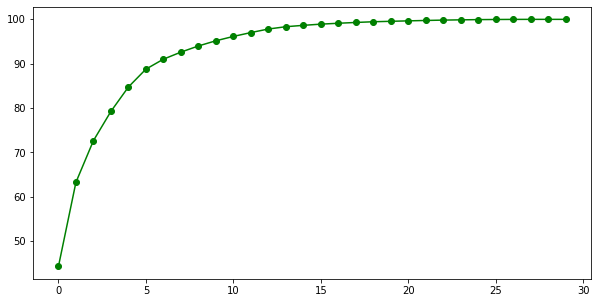

In [35]:
var = pca_.explained_variance_ratio_
var1=np.cumsum(np.round(pca_.explained_variance_ratio_, decimals=4)*100)
plt.figure(figsize = (10,5))
plt.plot(var1, '-go')


In [36]:
#Choose to take 14 comps
pca_2 = PCA(n_components=14)
pca_2.fit(std_features.values)
df_pca = pca_2.fit_transform(std_features.values)

print (df_pca)

[[ 9.19283683  1.94858307 -1.12316617 ... -0.85900838  0.10337865
  -0.69075783]
 [ 2.3878018  -3.76817174 -0.52929269 ...  0.15792533 -0.94353328
  -0.65345236]
 [ 5.73389628 -1.0751738  -0.55174759 ...  0.1243837  -0.41062164
   0.01665445]
 ...
 [ 1.25617928 -1.90229671  0.56273053 ...  0.0964753   0.1574144
   0.28570959]
 [10.37479406  1.67201011 -1.87702933 ... -0.69746187  1.22519604
   0.21869338]
 [-5.4752433  -0.67063679  1.49044308 ... -0.17949584  0.67889655
  -1.17072075]]


In [37]:
pc_df = pd.DataFrame(data = df_pca, columns = ['principal component 1', 'principal component 2'])

ValueError: Shape of passed values is (569, 14), indices imply (569, 2)

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['diagnosis'] == target
    print(indicesToKeep)
    plt.scatter(pc_df.loc[indicesToKeep, 'principal component 1'] ,pc_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

In [40]:
from scipy.stats import pointbiserialr

In [41]:
correlation, pval = pointbiserialr(df['diagnosis'],df['area_mean'])
correlation

0.70898383658539

In [42]:
def get_PBS_corr_from_cols(df,target_col,cont_cols,thresh = 0 ):
    res = dict()
    for col in cont_cols:
        correlation, pval = pointbiserialr(df[target_col],df[col])
        res[col] = correlation
    inter = pd.Series(res, name='corr').reset_index()
    inter['abs_corr'] = pd.DataFrame.abs(inter['corr'])
    inter = inter[inter['abs_corr'] > thresh ]
    fin_res = inter.sort_values('corr',ascending=False)
    fin_res = fin_res.drop(columns = ['abs_corr'])
    return(fin_res)

In [44]:
PBS_corr = get_PBS_corr_from_cols(df,'diagnosis',np.asarray(df_ex_diag.columns),thresh=0)
PBS_corr

,index,corr
27,concave points_worst,0.793566
22,perimeter_worst,0.782914
7,concave points_mean,0.776614
20,radius_worst,0.776454
2,perimeter_mean,0.742636
23,area_worst,0.733825
0,radius_mean,0.730029
3,area_mean,0.708984
6,concavity_mean,0.696360
26,concavity_worst,0.659610
